In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

beehive_df = pd.read_csv('./beehive_dbscan.csv')
pleiades_df = pd.read_csv('./pleiades_dbscan.csv')
blanco1_df = pd.read_csv('./blanco1_dbscan.csv')
#ngc2451_df = pd.read_csv('./ngc2451_field.csv')

In [ ]:
#plt.figure(figsize=(5,5))
#plt.hist(ngc2451['probability'], bins = 8,histtype=u'step',
#         weights=(np.ones_like(ngc2451['probability']) / len(ngc2451['probability'])), label='NGC 2451', linewidth=2)
#plt.hist(beehive['probability'], bins = 7,histtype=u'step',
#         weights=(np.ones_like(beehive['probability']) / len(beehive['probability'])),label='Beehive', linewidth=2)
#plt.hist(blanco1['probability'], bins = 9,histtype=u'step',
#         weights=(np.ones_like(blanco1['probability']) / len(blanco1['probability'])), label='Blanco 1', linewidth=2)
#plt.hist(pleiades['probability'], bins = 8,histtype=u'step',
#         weights=(np.ones_like(pleiades['probability']) / len(pleiades['probability'])),label='Pleiades', linewidth=2)
#plt.xlabel('Probability',fontsize=12)
#plt.ylabel('Number of stars',fontsize=12)
#plt.xticks(fontsize=12, rotation=0)
#plt.yticks(fontsize=12, rotation=0)
#plt.axvline(x = 0.5, color = 'black', label = 'Cutoff', linestyle = '--')
#plt.legend()
#plt.savefig('./probability_histograms.jpg', bbox_inches = "tight")
#plt.show()

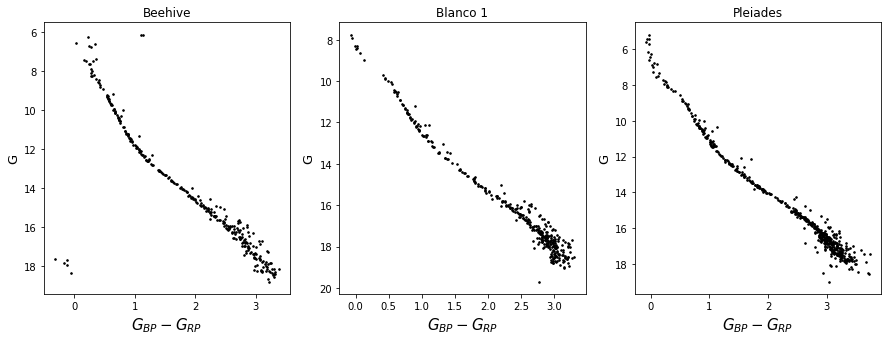

In [2]:
# BEFORE THE MEMBER SELECTION
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Beehive')
plt.scatter(beehive_df['bp'] - beehive_df['rp'], beehive_df['g'],color='black',marker = '.', alpha=1,s=10)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize = 15)
plt.ylabel("G", fontsize = 13)#,rotation=0)
plt.gca().invert_yaxis()

plt.subplot(1,3,2)
plt.title('Blanco 1')
plt.scatter(blanco1_df['bp'] - blanco1_df['rp'], blanco1_df['g'],color = 'black',marker = '.', alpha=1,s=10)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize = 15)
plt.ylabel("G", fontsize = 13)#,rotation=0)
plt.gca().invert_yaxis()

plt.subplot(1,3,3)
plt.title('Pleiades')
plt.scatter(pleiades_df['bp'] - pleiades_df['rp'], pleiades_df['g'],color='black',marker = '.', alpha=1,s=10)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize = 15)
plt.ylabel("G", fontsize = 13)#,rotation=0)
plt.gca().invert_yaxis()

In [ ]:
# NO MEMBERS
#ngc2451_ = ngc2451[(ngc2451['probability'] <= 0.5)]
#beehive_ = beehive[(beehive['probability'] <= 0.5)]
#blanco1_ = blanco1[(blanco1['probability'] <= 0.5)]
#pleiades_ = pleiades[(pleiades['probability'] <= 0.5)]
#print(np.shape(blanco1_))
#plt.figure(figsize=(10,8))
#plt.plot(blanco1_['ra'], blanco1_['dec'], color='black',marker='.',linestyle='None',markersize=5, alpha = 1)
#plt.axvline(popt[0])
#plt.axhline(popt_[0])
#plt.plot(popt[0], popt_[0], c = 'red', markersize = 5, alpha = 1, marker = 'o')
#plt.xlabel(r"$\alpha$ [deg]", fontsize = 15)
#plt.ylabel(r"$\delta$ [deg]", fontsize = 15)
#plt.savefig('nuevo_datos.png')
#plt.show()

# After membership selection

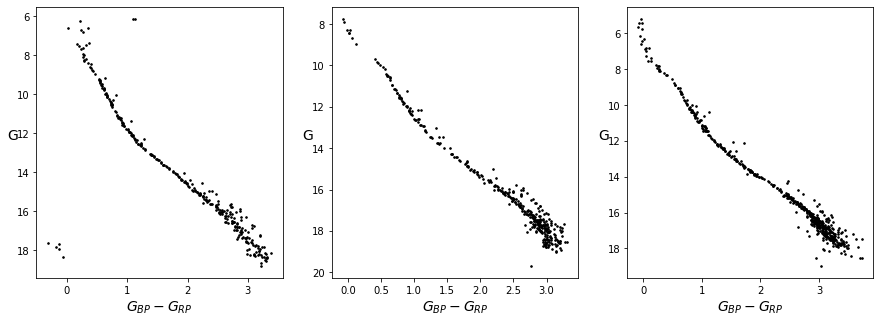

In [3]:
#ngc2451 = ngc2451_df[(ngc2451_df['probability'] >= 0.5)]
beehive = beehive_df#[(beehive_df['probability'] >= 0.5)]
blanco1 = blanco1_df#[(blanco1_df['probability'] >= 0.5)]
pleiades = pleiades_df#[(pleiades_df['probability'] >= 0.5)]

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(beehive['bp'] - beehive['rp'], beehive['g'],color='black',marker = '.', alpha=1,s=10)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize = 14)
plt.ylabel("G", fontsize = 14,rotation=0)
plt.gca().invert_yaxis()

plt.subplot(1,3,2)
plt.scatter(blanco1['bp'] - blanco1['rp'], blanco1['g'],color='black',marker = '.', alpha=1,s=10)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize = 14)
plt.ylabel("G", fontsize = 14,rotation=0)
plt.gca().invert_yaxis()

plt.subplot(1,3,3)
plt.scatter(pleiades['bp'] - pleiades['rp'], pleiades['g'],color='black',marker = '.', alpha=1,s=10)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize = 14)
plt.ylabel("G", fontsize = 14,rotation=0)
plt.gca().invert_yaxis()
#plt.savefig('./CMDs.jpg', bbox_inches = "tight")

# Functions

In [4]:
def gaussian(x, mean, std):
    return 1 / np.sqrt(2 * np.pi * std**2) * np.exp(- (x - mean)**2 / std**2)

def theta(alpha, delta, alpha_center, delta_center):
    return np.sqrt((alpha - alpha_center) * np.cos(np.deg2rad(delta))**2 + (delta - delta_center)**2)

def king_model(r, rho_0, r_c, r_t):
    return rho_0 * (1 / np.sqrt(1 + (r / r_c)**2) - 1 / np.sqrt(1 + (r_t / r_c)**2))**2

def elson_model(r, rho_0, r_c, eta):
    return rho_0 * (1 + (r / r_c)**2)**(-0.5 * eta)

#def nuker_model(r, rho_bg, rho_0, r_c, r_t, eta, gamma, alpha, delta, epsilon):
#    a = (1 + (r / r_c)**(alpha))**(-(eta - gamma) / alpha)
#    b = (1 + (r / r_t)**(delta))**(-(epsilon - eta) / delta)
#    return rho_bg + rho_0 * 2**((eta - gamma) / alpha) * (r / r_c)**(-gamma) * a * b

# Blanco 1

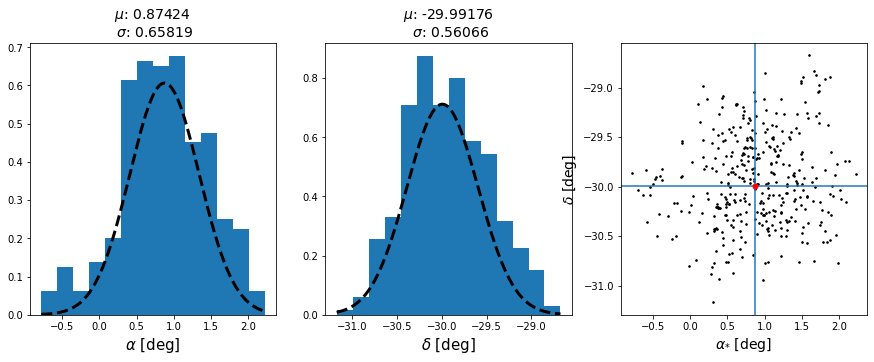

In [5]:
#blanco1 = blanco1_df[(blanco1_df['probability'] >= 0.5)]
blanco1 = pd.read_csv('./blanco1_dbscan.csv')
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
bin_heights, bin_borders,_ = plt.hist(blanco1['ra'], bins = 'auto', 
                                      range = (min(blanco1['ra']), max(blanco1['ra'])), density = True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0 = (np.mean(blanco1['ra']), np.std(blanco1['ra'])))
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian(x, *popt), color = 'black', linestyle = '--', linewidth = 3) 
plt.title('$\mu$: {:.5f} \n $\sigma$: {:.5f}'.format(popt[0], popt[1]),fontsize=14)
#label='$\mu$:{%popt[]} \n $\sigma$:')
plt.xlabel(r'$\alpha$ [deg]',fontsize = 15)

plt.subplot(1, 3, 2)
bin_heights, bin_borders,_ = plt.hist(blanco1['dec'], bins = 'auto', 
                                      range = (min(blanco1['dec']), max(blanco1['dec'])), density = True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt_, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0 = (np.mean(blanco1['dec']), np.std(blanco1['dec'])))
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian(x, *popt_), label = 'Gaussian', color = 'black', linestyle = '--', linewidth = 3)
plt.title('$\mu$: {:.5f} \n $\sigma$: {:.5f}'.format(popt_[0], popt_[1]),fontsize=14)
plt.xlabel(r'$\delta$ [deg]',fontsize = 15)
#plt.show()

#plt.figure(figsize=(5,5))
plt.subplot(1,3,3)
plt.scatter(blanco1['ra'], blanco1['dec'], c='black',marker='.',s=10)
plt.axvline(popt[0])
plt.axhline(popt_[0])
plt.plot(popt[0], popt_[0], c = 'red', markersize = 5, alpha = 1, marker = 'o')
plt.xlabel(r"$\alpha_{*}$ [deg]", fontsize = 14)
plt.ylabel(r"$\delta$ [deg]", fontsize = 14)
#plt.savefig('blanco1_coordinates.png',bbox_inches='tight')
plt.show()

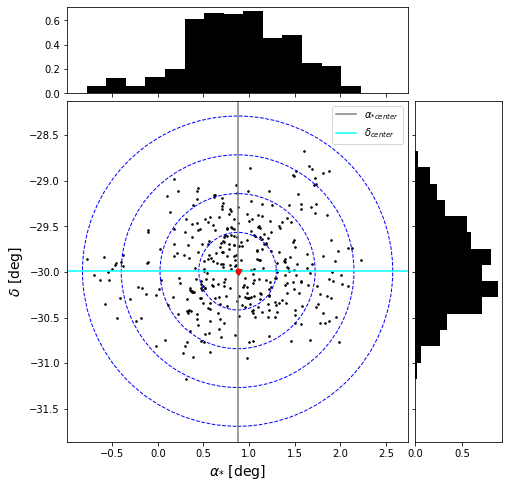

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(8, 8))
# the scatter plot:
ax.scatter(blanco1['ra'], blanco1['dec'], c='black',marker='.',s=10)
plt.axvline(popt[0], label=r'$\alpha_{*center}$',c='grey')
plt.axhline(popt_[0], label=r'$\delta_{center}$', c='cyan')
r_range = np.linspace(0,1.7,5)
for i in r_range:
    ax.add_patch(plt.Circle((popt[0], popt_[0]), i, color='b', fill=False, ls='--', lw=1))
plt.plot(popt[0], popt_[0], c = 'red', markersize = 5, alpha = 1, marker = 'o')
plt.xlabel(r"$\alpha_{*}$ [deg]", fontsize = 14)
plt.ylabel(r"$\delta$ [deg]", fontsize = 14)
plt.legend()
# Set aspect of the main axes.
ax.set_aspect(1.)
# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)
# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)
# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(blanco1['ra'])), np.max(np.abs(blanco1['dec'])))
lim = (int(xymax/binwidth) + 1)*binwidth
bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(blanco1['ra'], bins='auto',density = True,color='black')
ax_histy.hist(blanco1['dec'], bins='auto', orientation='horizontal',color='black',density = True)
#ax_histx.set_yticks([0, 50, 100])
#ax_histy.set_xticks([0, 50, 100])
#plt.savefig('blanco1_coordinates.png',bbox_inches='tight')
plt.show()

In [7]:
thetas = theta(blanco1['ra'], blanco1['dec'], popt[0], popt_[0])

blanco1['theta'] = thetas
blanco1 = blanco1.dropna(subset = ['theta'], how = 'all')

cluster_distance = 236.7 #pc Literatura
radios = cluster_distance * np.tan(np.deg2rad(blanco1['theta']))
blanco1['radios'] = radios
#print(blanco1['radios'])

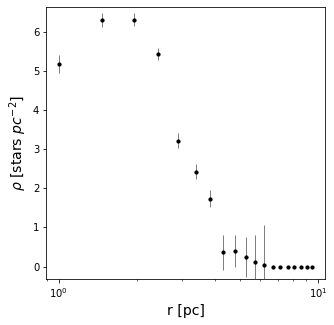

In [8]:
#percentiles = []|
#for i in range(100):
#    percentiles.append(np.percentile(blanco1['radios'], i))

test_r = np.linspace(1,10,20)
#test_r = np.random.random_sample(30)*20
rho = []
errors = []
for i in range(len(test_r)-1):
    N = sum((radios > test_r[i]) & (radios < test_r[i+1]))
    rho.append(N/(np.pi * ((test_r[i+1])**2 - test_r[i]**2)))
    errors.append(1/np.sqrt(N))
    
plt.figure(figsize = (5,5))
plt.scatter(test_r[:-1], rho, c = 'k', marker = '.', label = 'Blanco 1')
plt.errorbar(test_r[:-1],rho,errors,fmt='.k',alpha=0.5,lw=1)
plt.xscale('log')
plt.ylabel(r'$\rho$ [stars $pc^{-2}$]', fontsize = 14)
plt.xlabel('r [pc]', fontsize = 14)
#plt.legend()
#plt.axvline(3.5)
#plt.axvline(13)
#plt.savefig('./blanco1_rdp.jpg',bbox_inches = "tight")
plt.show()

King: rho_0: 38.10684883037366 r_c: 4.913043242506808 r_t: 7.205825700527236
Elson: rho_0: 7.363331912340637 r_c: 326.8293340776045 eta: 20221.175891370167


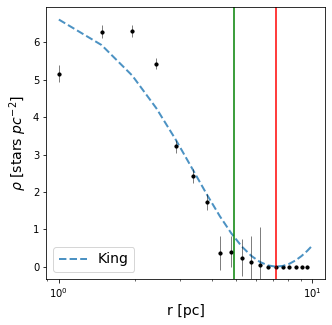

In [12]:
# FIT MODELS
#rho = np.append(rho,0)
data = np.zeros((len(test_r[:-1]),2))
data[:,0] = test_r[:-1]
data[:,1] = rho

r_c, r_t = 4., 8.
rho_0 = np.average(data[data[:,0] < r_c, 1])
#King_model = rho_bg, rho_0, r_c, r_t
#Elson_model = rho_0, r_c, eta
king_param = (30, r_c, r_t)
elson_param = (30, r_c, 5)

popt, pcov = curve_fit(king_model, test_r[:-1], rho , p0 = king_param, method='dogbox')
print('King:','rho_0:',popt[0], 'r_c:', popt[1], 'r_t:', popt[2])
popt2, pcov2 = curve_fit(elson_model, test_r[:-1], rho , p0 = elson_param, method='lm')
print('Elson:','rho_0:', popt2[0], 'r_c:', popt2[1], 'eta:', popt2[2])
y_king = king_model(test_r, popt[0], popt[1], popt[2])
y_elson = elson_model(test_r, popt2[0], popt2[1], popt2[2])

plt.figure(figsize = (5,5))
#plt.title('Blanco 1',fontsize = 14)
plt.plot(test_r, y_king, '--', lw = 2, label = 'King',alpha=0.8)
#plt.plot(test_r, y_elson, '--', lw = 2, label = 'Elson',alpha=0.8)
plt.scatter(test_r[:-1], rho, c = 'k', marker = '.')
plt.errorbar(test_r[:-1],rho,errors,fmt='.k',alpha=0.5,lw=1)
plt.xscale('log')
plt.ylabel(r'$\rho$ [stars $pc^{-2}$]', fontsize = 14)
plt.xlabel('r [pc]', fontsize = 14)
plt.legend(fontsize = 14)
plt.axvline(popt[1], color='green')
plt.axvline(popt[2], color='red')
plt.savefig('./blanco1_rdp_fit.jpg',bbox_inches = "tight")
plt.show()

In [13]:
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

[[261.27638271  15.80228509  -7.35875934]
 [ 15.80228509   1.13502125  -0.29474303]
 [ -7.35875934  -0.29474303   0.36204309]]
[16.16404599  1.06537376  0.60170017]


# Pleiades

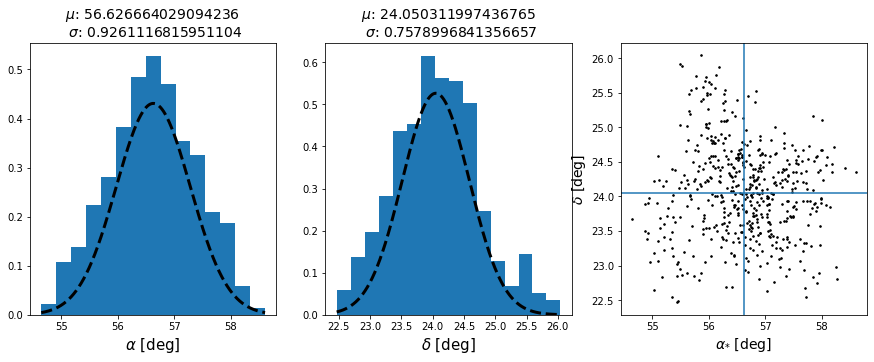

In [14]:
pleiades = pd.read_csv('./pleiades_dbscan.csv')
#pleiades = pleiades_df#[(pleiades_df['probability'] >= 0.5)]
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
bin_heights, bin_borders,_ = plt.hist(pleiades['ra'], bins = 'auto', 
                                      range = (min(pleiades['ra']), max(pleiades['ra'])), density = True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0 = (np.mean(pleiades['ra']), np.std(pleiades['ra'])))
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian(x, *popt), label = 'Gaussian', color = 'black', linestyle = '--', linewidth = 3)
plt.xlabel(r'$\alpha$ [deg]',fontsize = 15)
plt.title('$\mu$: {} \n $\sigma$: {}'.format(popt[0], popt[1]),fontsize=14)

plt.subplot(1, 3, 2)
bin_heights, bin_borders,_ = plt.hist(pleiades['dec'], bins = 'auto', 
                                      range = (min(pleiades['dec']), max(pleiades['dec'])), density = True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt_, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0 = (np.mean(pleiades['dec']), np.std(pleiades['dec'])))
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian(x, *popt_), label = 'Gaussian', color = 'black', linestyle = '--', linewidth = 3)
plt.xlabel(r'$\delta$ [deg]',fontsize = 15)
plt.title('$\mu$: {} \n $\sigma$: {}'.format(popt_[0], popt_[1]),fontsize=14)

plt.subplot(1, 3, 3)
plt.scatter(pleiades['ra'], pleiades['dec'], c='black',marker='.',s=10)
plt.axvline(popt[0])
plt.axhline(popt_[0])
#plt.scatter(popt[0], popt_[0], c = 'red', s = 10, alpha = 1, marker = 'o')
plt.xlabel(r"$\alpha_{*}$ [deg]", fontsize = 14)
plt.ylabel(r"$\delta$ [deg]", fontsize = 14)
#plt.savefig('nuevo_datos.png')
plt.show()

In [15]:
thetas = theta(pleiades['ra'], pleiades['dec'], popt[0], popt_[0])

pleiades['theta'] = thetas
pleiades = pleiades.dropna(subset = ['theta'], how = 'all')

cluster_distance = 136.1 #pc Literatura
radios = cluster_distance * np.tan(np.deg2rad(pleiades['theta']))
pleiades['radios'] = radios

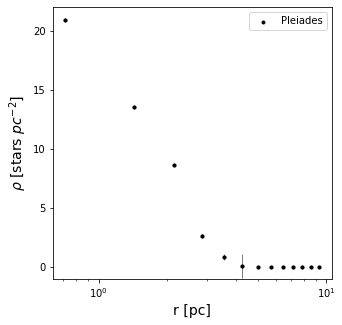

In [16]:
test_r = np.linspace(0,10,15)
#test_r = np.random.random_sample(30)*20
rho = []
errors = []
for i in range(len(test_r)-1):
    N = sum((radios > test_r[i]) & (radios < test_r[i+1]))
    rho.append(N/(np.pi * ((test_r[i+1])**2 - test_r[i]**2)))
    errors.append(1/np.sqrt(N))

#print(np.shape(rho), np.shape(test_r), np.shape(errors))
plt.figure(figsize = (5,5))
plt.scatter(test_r[:-1], rho, c = 'k', marker = '.', label = 'Pleiades')
plt.errorbar(test_r[:-1],rho,errors,fmt='.k',alpha=0.5,lw=1)
plt.xscale('log')
plt.ylabel(r'$\rho$ [stars $pc^{-2}$]', fontsize = 14)
plt.xlabel('r [pc]', fontsize = 14)
#plt.legend(fontsize = 14)
#plt.axvline(3.5)
#plt.axvline(13)
plt.legend()
#plt.savefig('./pleiades_rdp.jpg',bbox_inches = "tight")
plt.show()

King parameters: rho_0: 56.62655814627079 r_c: 2.8965937131237873 r_t: 6.112563403449221
Elson parameters: rho_0: 18.52659303217289 r_c: 195.7155648648894 eta: 14041.163040094643


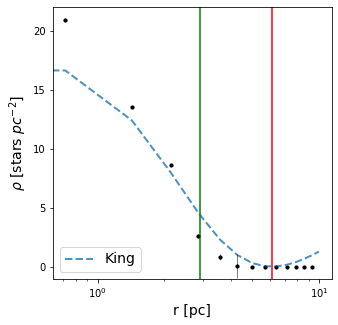

In [19]:
# FIT MODELS
#King_model = rho_bg, rho_0, r_c, r_t
#Elson_model = rho_0, r_c, eta
#Nuker model = rho_bg, rho_0, r_c, r_t, eta, gamma, alpha, delta, epsilon
r_c, r_t = 1.4, 10.5

data = np.zeros((len(test_r[:-1]),2))
data[:,0] = test_r[:-1]
data[:,1] = rho

rho_0 = np.average(data[data[:,0] < r_c, 1])

king_param = (rho_0, r_c, r_t)
elson_param = (rho_0, r_c, 5)

popt, pcov = curve_fit(king_model, test_r[:-1], rho , p0 = king_param, method='lm')
print('King parameters:','rho_0:',popt[0], 'r_c:', popt[1], 'r_t:', popt[2])

popt2, pcov2 = curve_fit(elson_model, test_r[:-1], rho , p0 = elson_param, method='lm')
print('Elson parameters:','rho_0:', popt2[0], 'r_c:', popt2[1], 'eta:', popt2[2])   

yfit = king_model(test_r, popt[0], popt[1], popt[2])
yfit2 = elson_model(test_r, popt2[0], popt2[1], popt2[2])

plt.figure(figsize = (5,5))
#plt.title('Pleiades',fontsize=14)
plt.plot(test_r, yfit, '--', lw = 2, label = 'King',alpha=0.8)
#plt.plot(test_r, yfit2, '--', lw = 2, label = 'Elson',alpha=0.8)
plt.scatter(test_r[:-1], rho, c = 'k', marker = '.')
plt.errorbar(test_r[:-1],rho,errors,fmt='.k',alpha=0.5,lw=1)
plt.xscale('log')
plt.ylabel(r'$\rho$ [stars $pc^{-2}$]', fontsize = 14)
plt.xlabel('r [pc]', fontsize = 14)
plt.axvline(popt[1], color='green')
plt.axvline(popt[2], color='red')
plt.legend(fontsize = 14)
plt.savefig('./pleiades_rdp_fit.jpg',bbox_inches = "tight")
plt.show()

In [21]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[22.3100778   0.67305957  1.01969529]


# Beehive

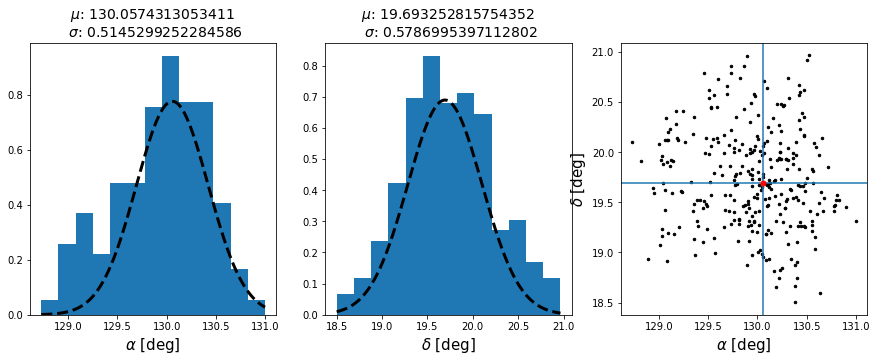

In [22]:
beehive = pd.read_csv('./beehive_dbscan.csv')
#beehive = beehive_df#[(beehive_df['probability'] >= 0.5)]

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
bin_heights, bin_borders,_ = plt.hist(beehive['ra'], bins = 'auto', 
                                      range = (min(beehive['ra']), max(beehive['ra'])), density = True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0 = (np.mean(beehive['ra']), np.std(beehive['ra'])))
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian(x, *popt), label = 'Gaussian', color = 'black', linestyle = '--', linewidth = 3)
plt.xlabel(r'$\alpha$ [deg]',fontsize = 15)
plt.title('$\mu$: {} \n $\sigma$: {}'.format(popt[0], popt[1]),fontsize=14)

plt.subplot(1, 3, 2)
bin_heights, bin_borders,_ = plt.hist(beehive['dec'], bins = 'auto', 
                                      range = (min(beehive['dec']), max(beehive['dec'])), density = True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt_, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0 = (np.mean(beehive['dec']), np.std(beehive['dec'])))
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian(x, *popt_), label = 'Gaussian', color = 'black', linestyle = '--', linewidth = 3)
plt.xlabel(r'$\delta$ [deg]',fontsize = 15)
plt.title('$\mu$: {} \n $\sigma$: {}'.format(popt_[0], popt_[1]),fontsize=14)

plt.subplot(1, 3, 3)
plt.plot(beehive['ra'], beehive['dec'], color='black',marker='.',linestyle='None',markersize=5, alpha = 1)
plt.axvline(popt[0])
plt.axhline(popt_[0])
plt.plot(popt[0], popt_[0], c = 'red', markersize = 5, alpha = 1, marker = 'o')
plt.xlabel(r"$\alpha$ [deg]", fontsize = 15)
plt.ylabel(r"$\delta$ [deg]", fontsize = 15)
#plt.savefig('nuevo_datos.png')
plt.show()

In [23]:
thetas = theta(beehive['ra'], beehive['dec'], popt[0], popt_[0])

beehive['theta'] = thetas
beehive = beehive.dropna(subset = ['theta'], how = 'all')

cluster_distance = 187 #pc Literatura
radios = cluster_distance * np.tan(np.deg2rad(beehive['theta']))
beehive['radios'] = radios

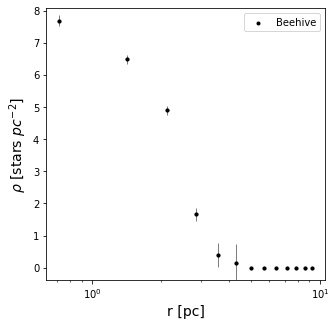

In [24]:
test_r = np.linspace(0,10,15)
#test_r = np.random.random_sample(30)*20
rho = []
errors = []
for i in range(len(test_r)-1):
    N = sum((radios > test_r[i]) & (radios < test_r[i+1]))
    rho.append(N/(np.pi * ((test_r[i+1])**2 - test_r[i]**2)))
    errors.append(1/np.sqrt(N))
    
plt.figure(figsize = (5,5))
plt.scatter(test_r[:-1], rho, c = 'k', marker = '.', label = 'Beehive')
plt.errorbar(test_r[:-1],rho,errors,fmt='.k',alpha=0.5,lw=1)
plt.xscale('log')
plt.ylabel(r'$\rho$ [stars $pc^{-2}$]', fontsize = 14)
plt.xlabel('r [pc]', fontsize = 14)
plt.legend()
#plt.axvline(3.5)
#plt.axvline(13)
#plt.savefig('./beehive_rdp.jpg',bbox_inches = "tight")
plt.show()

King parameters: rho_0: 27.289855144031932 r_c: 3.213424712899659 r_t: 6.339448140578784
Elson parameters: rho_0: 8.186937473904656 r_c: 306.68215420495784 eta: 29629.817325333377


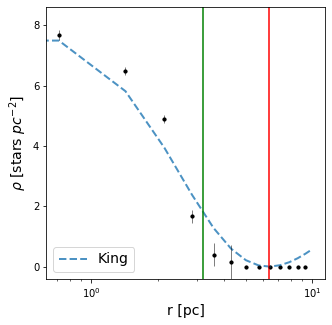

In [27]:
# FIT MODELS
#King_model = rho_bg, rho_0, r_c, r_t
#Elson_model = rho_0, r_c, eta
#Nuker model = rho_bg, rho_0, r_c, r_t, eta, gamma, alpha, delta, epsilon
r_c, r_t = 0.8, 17.1

data = np.zeros((len(test_r[:-1]),2))
data[:,0] = test_r[:-1]
data[:,1] = rho

rho_0 = np.average(data[data[:,0] < r_c, 1])

king_param = (rho_0, r_c, r_t)
elson_param = (1, r_c, 1)

popt, pcov = curve_fit(king_model, test_r[:-1], rho , p0 = king_param, method='dogbox')
print('King parameters:','rho_0:',popt[0], 'r_c:', popt[1], 'r_t:', popt[2])
popt2, pcov2 = curve_fit(elson_model, test_r[:-1], rho , p0 = elson_param, method='lm')
print('Elson parameters:','rho_0:', popt2[0], 'r_c:', popt2[1], 'eta:', popt2[2]) 

yfit = king_model(test_r, popt[0], popt[1], popt[2])
yfit2 = elson_model(test_r, popt2[0], popt2[1], popt2[2])

plt.figure(figsize = (5,5))
#plt.title('Beehive',fontsize=14)
plt.plot(test_r, yfit, '--', lw = 2, label = 'King',alpha=0.8)
#plt.plot(test_r, yfit2, '--', lw = 2, label = 'Elson',alpha=0.8)
plt.scatter(test_r[:-1], rho, c = 'black', marker = '.')
plt.errorbar(test_r[:-1],rho, errors,fmt='.k',alpha=0.5,lw=1)
plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.001,5)
plt.ylabel(r'$\rho$ [stars $pc^{-2}$]', fontsize = 14)
plt.xlabel('r [pc]', fontsize = 14)
plt.legend(fontsize = 14)
plt.axvline(popt[1], color='green')
plt.axvline(popt[2], color='red')
plt.savefig('./beehive_rdp_fit.jpg',bbox_inches = "tight")
plt.show()

In [24]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[7.4691184  0.49046632 0.64790232]


# NGC 2451

In [ ]:
ngc2451 = ngc2451_df[(ngc2451_df['probability'] >= 0.5)]

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
bin_heights, bin_borders,_ = plt.hist(ngc2451['ra'], bins = 'auto', 
                                      range = (min(ngc2451['ra']), max(ngc2451['ra'])), density = True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0 = (np.mean(ngc2451['ra']), np.std(ngc2451['ra'])))
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian(x, *popt), label = 'Gaussian', color = 'black', linestyle = '--', linewidth = 3)
plt.xlabel(r'$\alpha$ [deg]',fontsize = 15)
plt.text(118,0.3,'$\mu$: {} \n $\sigma$: {}'.format(popt[0], popt[1]),fontsize=14)

plt.subplot(1, 2, 2)
bin_heights, bin_borders,_ = plt.hist(ngc2451['dec'], bins = 'auto', 
                                      range = (min(ngc2451['dec']), max(ngc2451['dec'])), density = True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt_, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0 = (np.mean(ngc2451['dec']), np.std(ngc2451['dec'])))
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian(x, *popt_), label = 'Gaussian', color = 'black', linestyle = '--', linewidth = 3)
plt.xlabel(r'$\delta$ [deg]',fontsize = 15)
plt.text(-37,0.4,'$\mu$: {} \n $\sigma$: {}'.format(popt_[0], popt_[1]),fontsize=14)
plt.show()

plt.figure(figsize=(5,5))
plt.plot(ngc2451['ra'], ngc2451['dec'], color='black',marker='.',linestyle='None',markersize=5, alpha = 1)
plt.axvline(popt[0])
plt.axhline(popt_[0])
plt.plot(popt[0], popt_[0], c = 'red', markersize = 5, alpha = 1, marker = 'o')
plt.xlabel(r"$\alpha$ [deg]", fontsize = 15)
plt.ylabel(r"$\delta$ [deg]", fontsize = 15)
#plt.savefig('nuevo_datos.png')
plt.show()

In [ ]:
thetas = theta(ngc2451['ra'], ngc2451['dec'], popt[0], popt_[0])

ngc2451['theta'] = thetas
ngc2451 = ngc2451.dropna(subset = ['theta'], how = 'all')

cluster_distance = 362 #pc Literatura
radios = cluster_distance * np.tan(np.deg2rad(ngc2451['theta']))
ngc2451['radios'] = radios
radios

In [ ]:
test_r = np.linspace(0,40,40)
#test_r = np.random.random_sample(30)*20
rho = []
errors = []
for i in range(len(test_r)-1):
    N = sum((radios > test_r[i]) & (radios < test_r[i+1]))
    rho.append(N/(np.pi * ((test_r[i+1])**2 - test_r[i]**2)))
    errors.append(1/np.sqrt(N))
    
plt.figure(figsize = (5,5))
plt.scatter(test_r[:-1], rho, c = 'k', marker = '.', label = 'Data')
plt.errorbar(test_r[:-1],rho,errors,fmt='.k',alpha=0.5,lw=1)
plt.xscale('log')
plt.ylabel(r'$\rho$ [stars $pc^{-2}$]', fontsize = 14)
plt.xlabel('r [pc]', fontsize = 14)
#plt.legend(fontsize = 14)
#plt.axvline(3.5)
#plt.axvline(13)
plt.savefig('./ngc2451_rdp.jpg',bbox_inches = "tight")
plt.show()

In [ ]:
# FIT MODELS
#King_model = rho_bg, rho_0, r_c, r_t
#Elson_model = rho_0, r_c, eta
#Nuker model = rho_bg, rho_0, r_c, r_t, eta, gamma, alpha, delta, epsilon
r_c, r_t = 6.0, 9.1

data = np.zeros((len(percentiles),2))
data[:,0] = percentiles
data[:,1] = rho

rho_bg, rho_0 = np.average(data[data[:,0] > r_t, 1]), np.average(data[data[:,0] < r_c, 1])

king_param = (0.01, 1, r_c, r_t)
elson_param = (1, r_c, 0.01)
nuker_param = (0.1, 2, r_c, r_t, 2., 0.05, 2, 1.7, 100)

popt, pcov = curve_fit(king_model, percentiles, rho , p0 = king_param, method='dogbox')
print('King parameters:','rho_bg:',popt[0], 'rho_0:', popt[1], 'r_c:', popt[2], 'r_t', popt[3])
popt2, pcov2 = curve_fit(elson_model, percentiles, rho , p0 = elson_param, method='lm')
print('Elson parameters:','rho_0:', popt2[0], 'r_c:', popt2[1], 'eta:', popt2[2])
popt3, pcov3 = curve_fit(nuker_model, percentiles, rho , p0 = nuker_param, method='trf')
print('Nuker parameters:','rho_bg:', popt3[0],'rho_0:', popt3[1],'r_c:', popt3[2],'r_t:',popt3[3],'eta:',popt3[4],'gamma:', 
      popt3[5],'alpha:', popt3[6],'delta:', popt3[7], 'epsilon', popt3[8])  

yfit = king_model(percentiles, popt[0], popt[1], popt[2], popt[3])
yfit2 = elson_model(percentiles, popt2[0], popt2[1], popt2[2])
yfit3 = nuker_model(percentiles, popt3[0], popt3[1], popt3[2], popt3[3], popt3[4], popt3[5], popt3[6], popt3[7], popt3[8])

plt.figure(figsize = (5,5))
plt.plot(percentiles, yfit, '--', lw = 2, label = 'King',alpha=0.8)
plt.plot(percentiles, yfit2, '--', lw = 2, label = 'Elson',alpha=0.8)
plt.plot(percentiles, yfit3, '--', lw = 2, label = 'Nuker',alpha=0.8)
plt.scatter(percentiles, rho, c = 'k', marker = '.', label = 'Data')
plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.001,5)
plt.ylabel(r'$\rho$ [stars $pc^{-2}$]', fontsize = 14)
plt.xlabel('r [pc]', fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('./ngc2451_radial_density_profile_fit.jpg',bbox_inches = "tight")
plt.show()